In [7]:
import numpy as np
import matplotlib.pyplot as plt
from randdiag import *
def offdiagonal_frobenius(A):
    loss = np.linalg.norm(A - np.diag(np.diagonal(A)),'fro')
    return loss
def compute_error(n, repeats):
    A = np.random.randn(n,n) + 1j*np.random.randn(n,n)
    U,_ = np.linalg.qr(A)
    err_rjd = 0
    for i in range(repeats):
        Q = randdiag(U)
        err_rjd += offdiagonal_frobenius(Q.conj().T @ U @ Q)
    return err_rjd / repeats

12 12


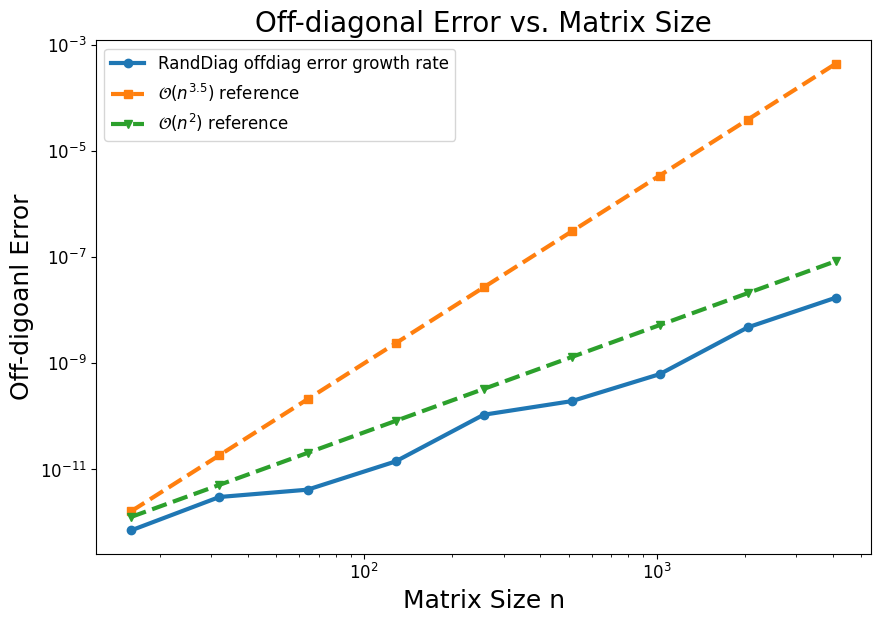

In [74]:
sizes = range(1,13)
sizes = [ 2**x for x in sizes]
errors = np.load('error_vs_size.npy')
errors[2] = compute_error(8,100)
print(len(sizes), len(errors))
sizes = sizes[3:]
errors = errors[3:]
plt.figure(figsize=(10,6.66666666))
plt.loglog(sizes,errors, '-o',linewidth=3.0,label = 'RandDiag offdiag error growth rate')
error_reference = np.array(sizes) ** (3.5) / 1e16
plt.loglog(sizes,error_reference, '--s',linewidth=3.0, label= r'$\mathcal{O}(n^{3.5})$ reference')
error_reference = np.array(sizes) ** (2) / 2e14
plt.loglog(sizes,error_reference, '--v',linewidth=3.0, label= r'$\mathcal{O}(n^{2})$ reference')
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Matrix Size n', fontsize=18)
plt.ylabel('Off-digoanl Error', fontsize=18)
plt.title('Off-diagonal Error vs. Matrix Size', fontsize=20)
plt.savefig('Error_growth_rate.pdf')